## Multi Linear Regression
Author: Ejaz-ur-Rehman\
Date Created: 25-03-2025\
Email ID: ijazfinance@gmail.com

In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris


- The Iris dataset is a built-in dataset in sklearn. It contains 150 samples of iris flowers with four features:
1. Sepal length
2. Sepal width
3. Petal length
4. Petal width
- The target variable is the species, but we will predict petal length based on the other three features.

In [2]:
# Step 2: Load the Iris Dataset
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Rename columns for better readability
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Display first five rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Step 3: Define Features (X) and Target (y)
# For multiple linear regression, we define:

# X: Independent variables (predictors)
# y: Dependent variable (response)

# Here, we predict petal length using sepal length, sepal width, and petal width.
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']


In [4]:
# Step 4: Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 5: Train the Multiple Linear Regression Model
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: -0.2621959025887062
Coefficients: [ 0.72281463 -0.63581649  1.46752403]


In [6]:
# Step 6: Make Predictions
y_pred = model.predict(X_test)


In [7]:
# Step 7: Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 0.1300162603138269
Root Mean Squared Error: 0.3605776758395158
R² Score: 0.9603293155857664


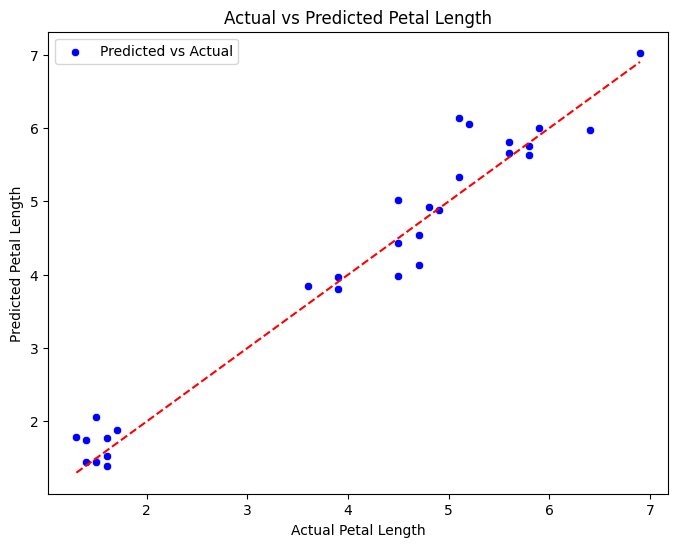

In [8]:
# Step 8: Visualize Predictions
# 1. Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect Fit Line
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Actual vs Predicted Petal Length")
plt.legend()
plt.show()


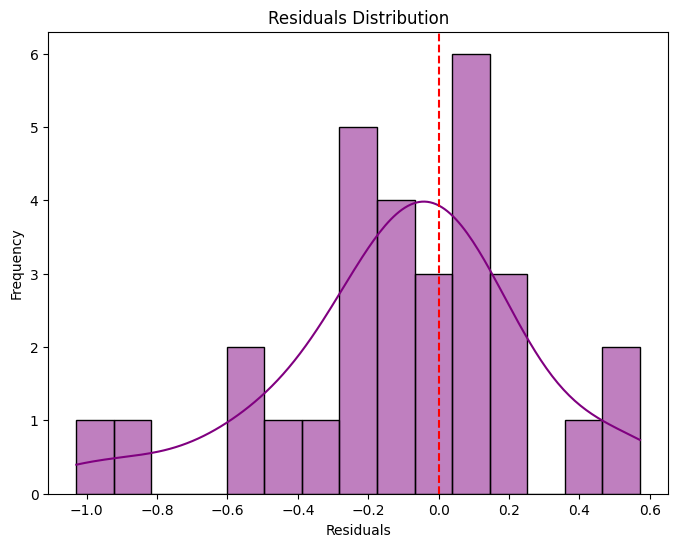

In [9]:
# 2. Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=15, kde=True, color='purple')
plt.axvline(x=0, color='red', linestyle='--')  # Centered at 0
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()


In [10]:
pip install dash plotly pandas scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 3.1 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.0 MB 3.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.0 MB 3.2 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.0 MB 3.8 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/8.0 MB 3.6 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Create the Dashboard
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Rename columns for better readability
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Define features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Initialize Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("📊 Multiple Linear Regression on IRIS Dataset", style={'textAlign': 'center', 'color': '#4CAF50'}),
    
    # Scatter Plot
    html.H3("🔹 Actual vs Predicted Petal Length"),
    dcc.Graph(id='scatter-plot'),
    
    # Residual Plot
    html.H3("🔹 Residuals Distribution"),
    dcc.Graph(id='residual-plot'),

    # Model Evaluation
    html.H3("🔹 Model Performance Metrics"),
    html.Div([
        html.P(f"Mean Squared Error: {mse:.3f}"),
        html.P(f"R² Score: {r2:.3f}"),
    ], style={'border': '2px solid #4CAF50', 'padding': '10px', 'borderRadius': '10px'}),

    # Interactive Prediction
    html.H3("🔹 Predict Petal Length"),
    html.Label("Sepal Length:"),
    dcc.Slider(id='sepal-length', min=df['sepal_length'].min(), max=df['sepal_length'].max(), value=5.0, step=0.1, marks={i: str(i) for i in range(4, 9)}),
    
    html.Label("Sepal Width:"),
    dcc.Slider(id='sepal-width', min=df['sepal_width'].min(), max=df['sepal_width'].max(), value=3.0, step=0.1, marks={i: str(i) for i in range(2, 5)}),
    
    html.Label("Petal Width:"),
    dcc.Slider(id='petal-width', min=df['petal_width'].min(), max=df['petal_width'].max(), value=1.0, step=0.1, marks={i: str(i) for i in range(0, 3)}),
    
    html.H3("Predicted Petal Length:"),
    html.H2(id='prediction-output', style={'color': '#FF5733'})
])

# Callbacks for Visualization
@app.callback(
    Output('scatter-plot', 'figure'),
    Output('residual-plot', 'figure'),
    Output('prediction-output', 'children'),
    Input('sepal-length', 'value'),
    Input('sepal-width', 'value'),
    Input('petal-width', 'value')
)
def update_graphs(sepal_length, sepal_width, petal_width):
    # Scatter Plot
    scatter_fig = px.scatter(
        x=y_test, y=y_pred,
        labels={'x': 'Actual Petal Length', 'y': 'Predicted Petal Length'},
        title="Actual vs Predicted Petal Length",
        color_discrete_sequence=["blue"]
    )
    scatter_fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], mode='lines', name='Perfect Fit', line=dict(color='red', dash='dash')))
    
    # Residuals Plot
    residuals = y_test - y_pred
    residual_fig = px.histogram(residuals, nbins=15, title="Residuals Distribution", color_discrete_sequence=["purple"])
    residual_fig.add_vline(x=0, line=dict(color="red", dash="dash"))

    # Predict Petal Length
    input_features = np.array([[sepal_length, sepal_width, petal_width]])
    predicted_petal_length = model.predict(input_features)[0]

    return scatter_fig, residual_fig, f"{predicted_petal_length:.3f}"

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



## Model Overview
- We applied Multiple Linear Regression (MLR) on the Iris dataset to predict Petal Length based on the independent variables:
    - Sepal Length
    - Sepal Width
    - Petal Width

- This model attempts to find a linear relationship between these three features (X) and the target variable (y).

### Interpretation of Model Performance Metrics
- Mean Squared Error (MSE) = 0.130
    - MSE represents the average squared difference between actual and predicted values.
    - A lower MSE indicates a better fit.
    - Interpretation: The model’s predictions deviate by an average of 0.130 squared units from the actual petal length values.
- Root Mean Squared Error (RMSE) = 0.361
    - RMSE is the square root of MSE, representing the average error in the same units as the target variable.
    - Interpretation: On average, our model's predictions have an absolute error of 0.361 cm in petal length.
    - A lower RMSE (compared to the scale of petal length) confirms that the model is relatively accurate
- R² Score (Coefficient of Determination) = 0.960
    - R² measures how well the independent variables explain the variability of the dependent variable.
        - Ranges from 0 to 1:
            - R² = 1 → Perfect Fit
            - R² = 0 → Model explains nothing
- Interpretation:
    - Our model explains 96.03% of the variance in petal length using the given independent variables.
    - This is a very high R² value, indicating that the model has strong predictive power.



### Final Model Evaluation
- Strengths:
    - High R² (0.96): Strong correlation between features and target.
    - Low RMSE (0.361): Predictions are accurate.
    - Small MSE (0.130): Model errors are minimal.
- Limitations:
    - Model might overfit if the same features are highly correlated (multicollinearity).
    - If tested on new unseen data, performance may slightly drop
- Next Steps (Improvements):
    - Check for feature multicollinearity (using VIF).
    - Try adding more features to improve generalization.
    - Validate on new dataset to check robustness.